# Машинное обучение, ВМК МГУ

## Практическое задание 3. Метод опорных векторов и логистическая регрессия

### Общая информация

Дата выдачи: 5 ноября 2021

Мягкий дедлайн: 23:59MSK 19 ноября 2021 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:59MSK 26 ноября 2021.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **10 баллов + 4.8 бонусов**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

In [1]:
%pylab inline
import pandas as pd

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


My drive with data:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Часть 1. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [3]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [4]:
from sklearn.svm import LinearSVC

In [5]:
model = LinearSVC(dual=False) # прямая задача
model.fit(X_train, y_train)
y_score = model.decision_function(X_test)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

**Замечания**

* Обратите внимание, что ROC/PR-curve строится по предсказанным вероятностям (а не бинаризованым меткам ответов)
* Соответственно ROC/PR-AUC так же считается по предсказанным вероятностям

In [6]:
from sklearn.metrics import auc, roc_curve, precision_recall_curve

In [7]:
fpr, tpr, thr = roc_curve(y_test, y_score)
precision, recall, thr = precision_recall_curve(y_test, y_score)

Вспомогательная функция для отрисовки графиков кривых с AUC:

In [8]:
def plot_curve_w_auc(ax, title_, x, y, color_, xlabel_, ylabel_, eps=0.02):
    ax.set_title(title_)
    ax.plot(x, y, lw=2, color=color_)
    ax.fill_between(x, y, alpha=0.25, color=color_)
    ax.set_xlim([-eps, 1 + eps])
    ax.set_ylim([-eps, 1 + eps])
    ax.set_xlabel(xlabel_)
    ax.set_ylabel(ylabel_)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.text(0.5, 0.5, f'auc = {auc(x, y):.4f}', fontsize='large',
            ha='center', va='center',
            bbox=dict(boxstyle='square,pad=0.5', fc='w',
                      ec='grey', lw=1, alpha=0.75))

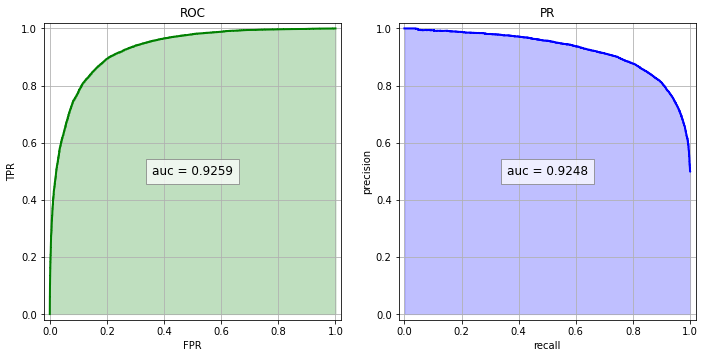

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)
plot_curve_w_auc(axes[0], 'ROC', fpr, tpr, 'g', 'FPR', 'TPR')
plot_curve_w_auc(axes[1], 'PR', recall, precision, 'b', 'recall', 'precision')

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

In [10]:
from sklearn.svm import SVC

In [11]:
X_, classes = make_classification(n_samples=200, n_features=2, random_state=42,
                                    n_informative=2, n_redundant=0)
classes = 2 * classes - 1
model = SVC(kernel='linear', random_state=0)
model.fit(X_, classes)
feat_1, feat_2 = np.split(X_, 2, axis=1)

Visualization:

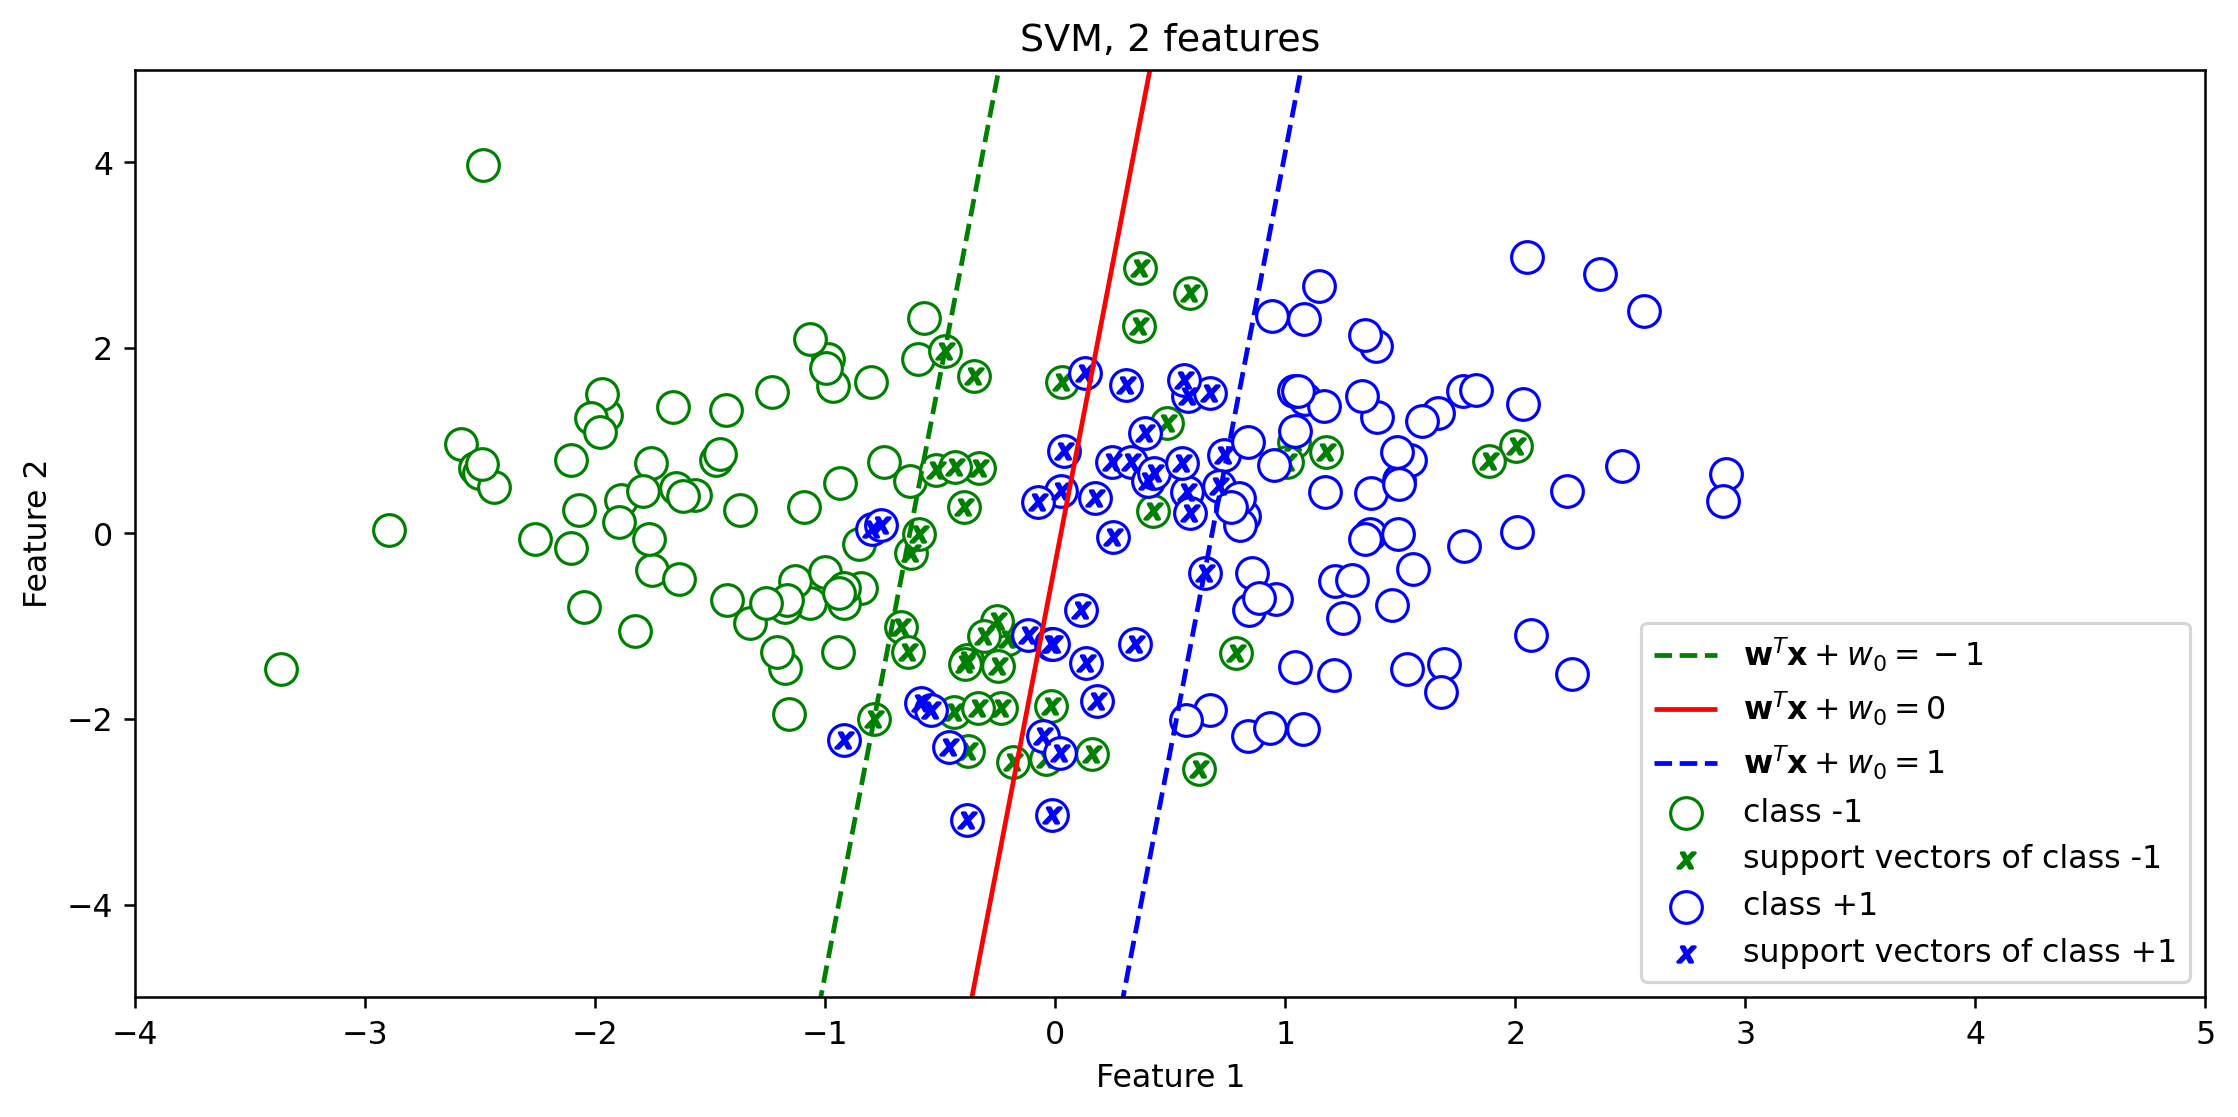

In [12]:
plt.figure(figsize=(10, 5), dpi=228)
plt.title('SVM, 2 features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()

x_pl, y_pl = np.meshgrid(np.linspace(-10, 10, 5), np.linspace(-10, 10, 5))
xy = np.vstack([x_pl.ravel(), y_pl.ravel()]).T
cls = plt.contour(x_pl, y_pl, model.decision_function(xy).reshape(x_pl.shape),
                  colors=['g', 'r', 'b'], levels=[-1, 0, 1],
                  linestyles=['--', '-', '--']).collections

# SVM borders in legend
for cl, _ in zip(cls, [-1, 0, 1]):
    cl.set_label(r'$\mathbf{w}^T \mathbf{x}+w_0=' + str(_) + '$')

# scatter vis and legend
for class_, color in zip([-1, 1], ['g', 'b']):
    class_ind = (classes == class_).nonzero()[0]
    supp_ind = np.intersect1d(class_ind, model.support_)
    
    #all
    plt.scatter(feat_1[class_ind], feat_2[class_ind],
                marker='o', label=f'class {class_:+}', linewidth=1,
                facecolors='white', edgecolors=color, s=100)
    #support
    plt.scatter(feat_1[supp_ind], feat_2[supp_ind],
                marker='$x$', label=f'support vectors of class {class_:+}', 
                facecolor=color, s=30)


plt.xlim([-4, 5])
plt.ylim([-5, 5])
plt.legend()
plt.show()

__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. 

* Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [13]:
def plot_calibration_curve(y_test, preds):
    """
    preds --- array of probabilities
    """
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        # mistake 1: from '-' to '+'
        bin_middle_points.append((l + r) / 2)
        # mistake 2: from 'min' to 'mean'
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios)

* **(?)** Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?


**Замечания**
* Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.
* Для нормировки в [0,1] decision_function используйте MinMaxScaler
* Не используйте параметр probability=True при обучении SVM -- этот параметр неявно запускает калибровку предсказания https://scikit-learn.org/stable/modules/svm.html#scores-probabilities

In [14]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LinearSVC(dual=False)  # n_samples >> n_features
model.fit(X_train, y_train)
y_svm_score = model.decision_function(X_test)
# MinMaxScaling
y_svm_proba = (y_svm_score - y_svm_score.min()) / (y_svm_score.max() - y_svm_score.min())

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_logreg_proba = model.predict_proba(X_test)[:, 1]

In [18]:
# custom plot fucntion
def my_plot_calibration_curve(y_test, preds, n_bins=20, name=None, color=None):
    bin_middle_points = []
    bin_real_ratios = []
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios, marker='o',
             label=name, color=color)

In [19]:
def plot_calib_hist(n_bins=20, eps=0.02):
    plt.figure(figsize=(11, 4.5))

    plt.subplot(121, aspect='equal')
    plt.title('Calibration curves')
    my_plot_calibration_curve(y_test, y_svm_proba, n_bins=n_bins,
        name='SVM', color='b')
    my_plot_calibration_curve(y_test, y_logreg_proba, n_bins=n_bins, name='Logistic regression', color='g')
    plt.plot([0, 1], color='grey', linestyle='--',
             label='Ideal calibration')
    plt.xlim([-eps, 1 + eps])
    plt.ylim([-eps, 1 + eps])
    plt.xticks(np.linspace(0, 1, 11))
    plt.yticks(np.linspace(0, 1, 11))
    plt.xlabel('Predicted proba')
    plt.ylabel('Fraction of class +1')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(122)
    plt.title('Histograms')
    plt.hist([y_svm_proba, y_logreg_proba], color=['b', 'g'], bins=n_bins, label=['SVM', 'Logistic regression'])
    plt.xlim([0, 1])
    plt.xticks(np.linspace(0, 1, 11))
    plt.xlabel('Predicted proba')
    plt.ylabel('Samples quantity')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()

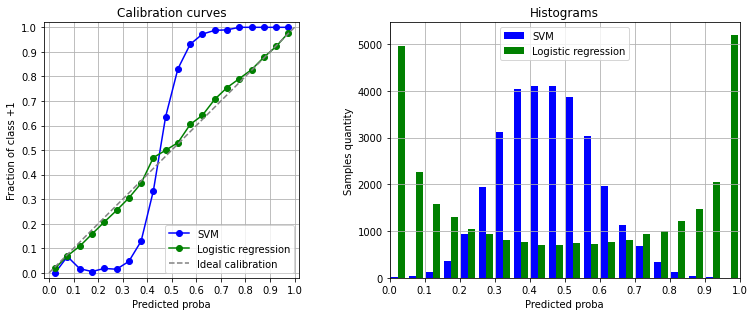

In [20]:
plot_calib_hist()

* По графику калибровочных кривых, что LogReg имеет хорошо откалиброванные ответы. А SVM даёт большие вероятности на малой доле положительных классов и малые вероятности на большой доле положительных классов.
* Ответы LogReg распределены в основном по крайним значениям (LogReg минимизирует Log(Loss)), а ответы SVM -наоборот, по центральным (вероятности SVM не откалиброваны)

**(?)** Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [21]:
from sklearn.calibration import CalibratedClassifierCV

In [22]:
model = CalibratedClassifierCV(LinearSVC(dual=False), method='sigmoid')
model.fit(X_train, y_train)
y_svm_proba = model.predict_proba(X_test)[:, 1]

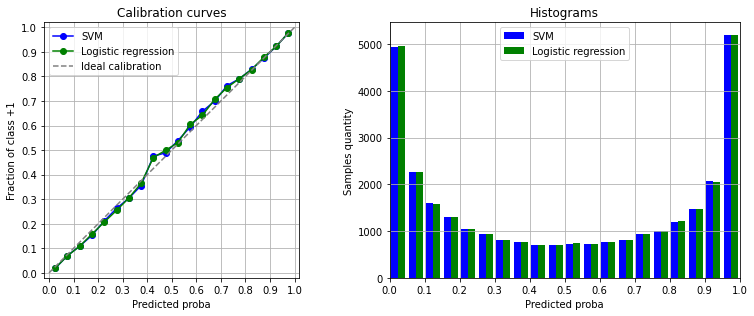

In [23]:
plot_calib_hist()

Сравним откалиброванны SVM с LogReg - очень похоже. Калибровочная кривая улучшилась, вероятности стали близкими к LogReg, к верным. То есть калибровка SVM с помощью сигмоиды прошла успешно.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [24]:
def my_plot_calibration_curve(y_test, preds, n_bins=20,
                                  name=None, color=None):
    bin_middle_points = []
    bin_real_ratios = []
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios, marker='o',
             label=name, color=color)

Используем нашу функцию калибровки `my_plot_calibration_curve` для прошлых вопросов.

## Часть 2. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(1 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [25]:
data = pd.read_csv('drive/MyDrive/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [26]:
np.random.seed(910)

In [27]:
mask_one = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)
data = pd.concat((data.iloc[mask_one], data.iloc[mask_zero]))
target = np.hstack((target[mask_one], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

In [28]:
X_train.describe()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2.004130,1.37000,4.497130,0.42935,0.500320,0.351120,0.292770,0.178180,0.177930,0.000450,0.001810,0.011150,0.001040,0.014450,7.115580,0.629090,0.151070,0.156200,0.628948,0.476676,0.616771,8.40946,0.801810,-0.436890,0.901700,-0.109130,6.718940,0.878790,0.81344,1.34322,0.992170,62.683100,2.338520,0.385403,0.842344,0.272787,3.114183,0.451190,0.449873,0.450285,2.37211,1.89083,7.683070,3.008300,9.23313,2.337070,8.443470,5.447950,1.441040,2.87945,7.555420,0.123140,0.631210,0.554500,0.287040,0.344120,0.151950
std,2.019429,0.67912,2.744301,0.49662,1.500394,0.477323,0.455036,0.382666,0.382456,0.021209,0.042506,0.105004,0.032232,0.137264,3.556255,0.483051,0.358119,0.363047,0.282497,0.427596,0.777430,2.56548,0.398638,0.824842,2.386532,0.844931,5.533163,0.408876,0.38956,0.97450,0.091372,33.316994,0.844672,0.061683,0.245477,0.364555,0.691499,0.286483,0.286704,0.286812,1.11669,1.13966,1.331316,1.422825,1.45839,1.249292,2.905706,2.341304,1.201282,1.69067,2.749553,0.328599,0.482479,0.497023,0.452383,0.475083,0.358974
min,0.000000,-1.00000,0.000000,-1.00000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.00000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.00000,-1.00000,0.000000,1.000000,-1.000000,0.141421,0.310658,-1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.00000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.554527,7.00000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.00000,0.00000,1.000000,32.000000,2.000000,0.316228,0.684676,0.330454,2.828427,0.200000,0.200000,0.200000,2.00000,1.00000,7.000000,2.000000,8.00000,1.000000,6.000000,4.000000,1.000000,2.00000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.00000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.759111,9.00000,1.000000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.00000,2.00000,1.000000,65.000000,3.000000,0.387298,0.787558,0.368782,3.316625,0.500000,0.500000,0.500000,2.00000,2.00000,8.000000,3.000000,9.00000,2.000000,8.000000,5.000000,1.000000,

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [29]:
# We will keep in mind, that:
# 'saga' - the best optimization
# 'sag' - the fastest optimization

model = LogisticRegression(solver='saga', max_iter=1e3, penalty='none',
                           verbose=3, tol=1e-3, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 380 epochs took 43 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.4s finished


**(?)** Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

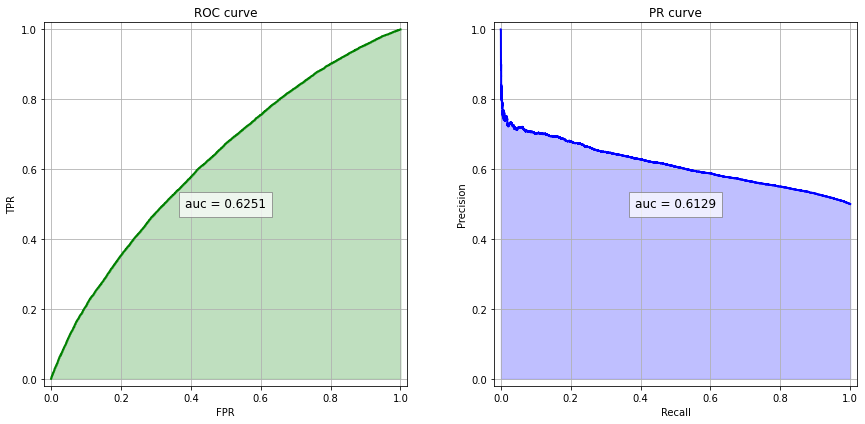

In [30]:
fpr, tpr, thr = roc_curve(y_test, y_pred_proba)
precision, recall, thr = precision_recall_curve(y_test, y_pred_proba)
fig, axes = plt.subplots(1, 2, figsize=(13, 6), tight_layout=True)
plot_curve_w_auc(axes[0], 'ROC curve', fpr, tpr, 'g', 'FPR', 'TPR')
plot_curve_w_auc(axes[1], 'PR curve', recall, precision, 'b', 'Recall', 'Precision')

**Ответ**:

Когда $recall = 1$, $precision \approx \frac{1}{2} \Rightarrow$ сбалансированность классов на `train` и `test`.

Также AUC качество модели невелико

__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1.5 балла)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

In [31]:
from sklearn.metrics import log_loss
from tqdm import tqdm
from sklearn.exceptions import ConvergenceWarning
import warnings

In [32]:
alphas = np.logspace(-3, 3, 7)
max_iter = 20
epochs_quant = 30
epochs = np.arange(1, epochs_quant+ 1)

In [33]:
import warnings

# ignore warnings for correct output of progressbars
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [34]:
loss_arr_train = []
loss_arr_test = []

for alpha in alphas:
    model = LogisticRegression(solver='saga', warm_start=True, C=1/alpha,
                               max_iter=max_iter, random_state=0)
    loss_train = []
    loss_test = []
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=ConvergenceWarning)
        for epoch in tqdm(epochs):
            model.fit(X_train, y_train)
            loss_train += [log_loss(y_train, model.predict_proba(X_train))]
            loss_test += [log_loss(y_test, model.predict_proba(X_test))]
    loss_arr_train += [loss_train]
    loss_arr_test += [loss_test]

100%|██████████| 30/30 [01:14<00:00,  2.48s/it]


Строим графики зависимости функции потерь от номера итерации при различных коэффициентах регуляризации:

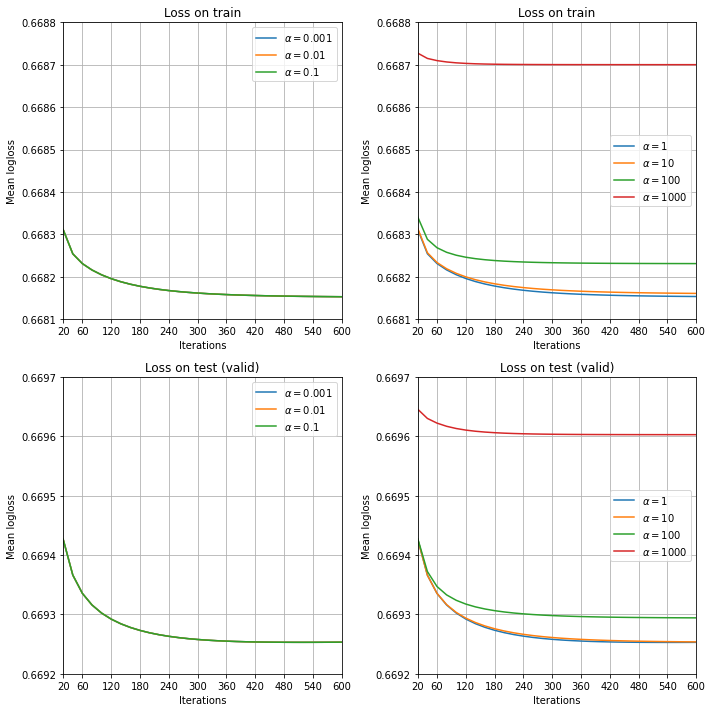

In [35]:
plt.figure(figsize=(10, 10))

for i, (losses_, title_, alphas_, ylim, subplot_) in \
    enumerate(zip([loss_arr_train[:3], loss_arr_test[:3],
                      loss_arr_train[3:], loss_arr_test[3:]],
                  ['Loss on train', 'Loss on test (valid)'] * 2,
                  [alphas[:3]] * 2 + [alphas[3:].astype(int)] * 2,
                  [(0.6681, 0.6688), (0.6692, 0.6697)] * 2, # for a single scale
                  [221, 223, 222, 224])):
    plt.subplot(subplot_)
    plt.title(title_)
    for loss, alpha in zip(losses_, alphas_):
        plt.plot(epochs * max_iter, loss, label=f'$\\alpha={alpha}$')
    plt.xticks([20, *range(max_iter * 3, max_iter * epochs_quant + 1, max_iter * 3)])
    plt.xlim(20, epochs_quant * max_iter)
    plt.ylim(ylim)
    plt.xlabel('Iterations')
    plt.ylabel('Mean logloss')
    plt.legend()
    plt.grid(True)

plt.tight_layout()

Сверху графики, полученные на обучающей выборке (`X_train`), снизу - на отложенной (`X_test`). В обоих случаях графики похожи (форма, монотонной убывание), только на отложенной выборке функции потерь чуть больше, что естественно

## Часть 3. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [36]:
from sklearn.metrics import roc_auc_score

In [37]:
model = LogisticRegression(solver='saga', max_iter=1e3, tol=1e-3, verbose=1, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 374 epochs took 42 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.3s finished


In [38]:
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}')

ROC AUC: 0.6251


__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [39]:
import re

In [40]:
cat_feats = list(filter(re.compile('.*cat').match, X_train.columns))

Функция для ohe:

In [41]:
def do_ohe(X_train, X_test):
    delim = X_train.shape[0]
    X_ohe = pd.get_dummies(pd.concat([X_train, X_test], axis=0), columns=cat_feats)
    return X_ohe.iloc[:delim], X_ohe.iloc[delim:]

In [42]:
X_train_ohe, X_test_ohe = do_ohe(X_train, X_test)
model.fit(X_train_ohe, y_train)
y_pred_proba = model.predict_proba(X_test_ohe)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 216 epochs took 65 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished


In [43]:
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}')

ROC AUC: 0.6329


Время работы алгритма увеличилось (хотя количество итераций стало меньше), качество увеличилось (было $0.6251$, теперь $0.6329$)

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки.

**Замечание (!)**
* При реализации счетчиков необходимо использовать один из методов борьбы с переобучением. В заданиях вам либо говорится, как использовать, либо вы выбираете сами

**(Бонусная часть)** Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 баллa)__

In [44]:
def add_noise(maps, std=0.1, seed=0):
    rng = np.random.default_rng(seed=seed)
    return {key: vals + rng.normal(scale=std, size=len(vals))
            for key, vals in maps.items()}

In [45]:
y_train_ser = pd.Series(y_train, index=X_train.index)
mean_maps = {col: y_train_ser.groupby(X_train[col]).mean() for col in cat_feats}

In [46]:
stds = np.hstack([0, np.logspace(-4, 0, 5)]) # standart deviations
results = pd.DataFrame(index=pd.Index(stds, name=r'$\sigma$'), columns=['ROC AUC score'], dtype=float)
for std in stds:
    maps_ = add_noise(mean_maps, std)
    X_train_mean_noise, X_test_mean_noise = X_train.replace(maps_), X_test.replace(maps_)
    model.fit(X_train_mean_noise, y_train)
    results.loc[std] = roc_auc_score(y_test, model.predict_proba(X_test_mean_noise)[:, 1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 284 epochs took 32 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 284 epochs took 32 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   32.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 288 epochs took 34 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 296 epochs took 33 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 336 epochs took 39 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 106 epochs took 12 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.9s finished


In [47]:
results.round(4)

,ROC AUC score
$\sigma$,
0.0000,0.6285
0.0001,0.6285
0.0010,0.6286
0.0100,0.6288
0.1000,0.6263
1.0000,0.6223


**Ответ:**
* Этот способ быстрее, чем ohe
* С ростом $\sigma$ алгоритм сходится быстрее, кроме случая $\sigma = 1.0$, он быстрее всех
* Качество растёт до $\sigma = 0.01$ и убывает после него (худшее при $\sigma = 1.0$)
* Лучшее качество $\approx 0.6288$ (при $\sigma = 0.1$) всё же хуже ROC AUC при ohe ($\approx 0.6329$)

__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

Используем колонку первую колонку, `id`, для ранжирования датасета:

In [48]:
X_t, y_t = (X_train.groupby(X_train.index).first(),
            y_train_ser.groupby(y_train_ser.index).first())
X_train_new, X_test_new = X_train.copy(), X_test.copy()

Преобразуем данные:

In [49]:
%%time
for feat in cat_feats:
    maps_ = y_t.groupby(X_t[feat]).expanding().mean()
    for v in maps_.index.levels[0]:
        for s in [X_test_new, X_train_new]:
            ind = np.digitize(s.index[s[feat] == v], maps_[v].index) - 1
            ind[ind < 0] = 0
            s.loc[s[feat] == v, feat] = maps_[v].iloc[ind].values

CPU times: user 3.07 s, sys: 149 ms, total: 3.21 s
Wall time: 3.05 s


In [50]:
model.fit(X_train_new, y_train)
y_pred_proba = model.predict_proba(X_test_new)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 162 epochs took 19 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.6s finished


In [51]:
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}')

ROC AUC: 0.6336


Это качество даже лучше, чем на ohe

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(1 балл)__

In [52]:
def do_smooth_maps(C=10):
    prior = data[cat_feats].mean()
    C = dict.fromkeys(cat_feats, C)
    maps = {}
    for feat in cat_feats:
        group = y_train_ser.groupby(X_train[feat])
        C_ =  C[feat]
        global_mean = prior[feat]
        maps[feat] = (group.sum() + C_* global_mean) / (group.size() + C_)
    return maps

In [53]:
smm_maps = do_smooth_maps()
Xtr_smm = X_train.replace(smm_maps)
Xts_smm = X_test.replace(smm_maps)
model.fit(Xtr_smm, y_train)
y_pred_proba = model.predict_proba(Xts_smm)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 276 epochs took 31 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.5s finished


In [54]:
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}')

ROC AUC: 0.6273


Это качество лучше, чем на данных без преобразований, но хуже, чем при ohe и чем при обычных счётчиках без сглаживания

То есть этот метод нужно донастраивать параметрами (`C` и `prior`)

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты.

**(?)** Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ:**

Плюсы:
* Много параметров для настройки, благодаря которым модно достичь качества, не меньшего, чем на ohe
* Меньшее время работы и меньше используемой памяти

Минусы:
* Чтобы получить хорошее качество, параметры счётчиков надо тщательно подбирать, иначе качество может быть низким*
* Сложность реализации (фолдинг и ранжирование)

## Часть 4. Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [55]:
data = pd.read_csv('drive/MyDrive/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [56]:
X_train, X_test = do_ohe(X_train, X_test)
print(f'Всего признаков: {X_train.shape[1]}')

Всего признаков: 227


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [57]:
model = LogisticRegression(solver='sag', max_iter=80, verbose=1, random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 106 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished


In [58]:
print(f'ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}')

ROC AUC: 0.6381


### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

**(?)** Изменилось ли качество? Как?

__(0.5 балла)__

In [59]:
def select_feats(X_train, X_test, n=200):
    i = np.abs(model.coef_[0]).argsort()[-n:]
    if isinstance(X_train, np.ndarray):
        return X_train[:, i], X_test[:, i]
    else:
        return X_train.iloc[:, i], X_test.iloc[:, i]

In [60]:
X_tr, X_ts = select_feats(X_train, X_test)

In [61]:
model.fit(X_tr, y_train)
y_pred_proba = model.predict_proba(X_ts)[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 96 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished


In [62]:
print(f'ROC AUC (отбор признаков без нормализации): {roc_auc_score(y_test, y_pred_proba):.4f}')

ROC AUC (отбор признаков без нормализации): 0.6383


**(?)** А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [64]:
methods = [StandardScaler, MinMaxScaler]
method_names = [method.__name__ for method in methods]
res = pd.DataFrame(index=pd.Index(method_names, name='method'), columns=['All feats', 'Selected feats'], dtype=float)

for method in methods:
    scaler = method()
    X_train_norm, X_test_norm = scaler.fit_transform(X_train), scaler.transform(X_test)
    
    model.fit(X_train_norm, y_train)
    y_pred_proba = model.predict_proba(X_test_norm)[:, 1]
    res.loc[method.__name__, 'All feats'] = roc_auc_score(y_test, y_pred_proba)
    
    X_tr, X_ts = select_feats(X_train_norm, X_test_norm)
    model.fit(X_tr, y_train)
    y_pred_proba = model.predict_proba(X_ts)[:, 1]
    res.loc[method.__name__, 'Selected feats'] = roc_auc_score(y_test, y_pred_proba)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 105 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 96 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 106 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 97 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished


In [65]:
res

,All feats,Selected feats
method,,
StandardScaler,0.638065,0.638106
MinMaxScaler,0.638025,0.638209


До отбора признаков высокое качество даёт стандартизация, а после отбора - min-max scaler, именно этот результат наилучший, $\approx 0.6382$. Последнее качество выше, чем ohe, счётчики и отбор без нормализации



### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случае.

__(0.5 балла)__

In [66]:
def t_statistic(X_pos, X_neg):
    v = (len(X_pos) * X_pos.var() + len(X_neg) * X_neg.var()) / (len(X_pos) + len(X_neg))
    return (X_pos.mean() - X_neg.mean()).abs() / np.sqrt(v)

In [67]:
%%time
top_ind = t_statistic(X_train.loc[y_train == 1], X_train.loc[y_train == 0]).nlargest(200).index

CPU times: user 1.25 s, sys: 18.6 ms, total: 1.27 s
Wall time: 1.27 s


In [68]:
model.fit(X_train[top_ind], y_train)
y_pred_proba = model.predict_proba(X_test[top_ind])[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 95 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished


In [69]:
print(f'ROC AUC (отбор признаков по t-статистике): {roc_auc_score(y_test, y_pred_proba):.4f}')

ROC AUC (отбор признаков по t-статистике): 0.6386


Это качество превосходит предыдущий (лучший) результат. Также этот алгоритм быстро работает

### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлемо. 

**Напишите функцию, которая отбирает признаки вышеприведенным способом (использовать готовые решения аналогичных библиотечных функций нельзя)**

**Замечание**
* Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

Реализация описанного выше жадного алгоритма:

In [70]:
def greedy_algo_feats(X_train, X_val, y_train, y_val, model, n_drops,
              random_state=None, max_iter=10):
    model.set_params(verbose=0)
    rng = np.random.default_rng(seed=random_state)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    prev_auc = roc_auc_score(y_val, y_pred_proba)
    ans = X_train.columns.tolist()
    drop = []
    for i in range(max_iter):
        rng.shuffle(ans)
        for col in ans:
            print(f'{prev_auc:.5f}', end=' ')
            model.fit(X_train.drop(columns=drop+[col]), y_train)
            y_pred_proba = model.predict_proba(X_val.drop(columns=drop+[col]))[:, 1]
            cur_auc = roc_auc_score(y_val, y_pred_proba)
            if cur_auc > prev_auc:
                prev_auc = cur_auc
                drop.append(col)
                if len(drop) == n_drops:
                    break
        for col in drop:
            ans.remove(col)
        if len(drop) == n_drops:
            break
    print()
    model.set_params(verbose=1)
    return ans

In [71]:
sample = train_test_split(X_train, y_train, test_size=0.5, random_state=0)

Жадный алгоритм, в ходе которого удаляем 1 признак, пробная итерация:

In [72]:
%%time
f = greedy_algo_feats(*sample, model, n_drops=1)

0.62725 0.62725 
CPU times: user 2min 38s, sys: 1.09 s, total: 2min 39s
Wall time: 2min 37s


Признак для удаления не нашёлся, так как качество не изменилось. Процесс удаления 1-го признака занял около 3-х минут, значит, процесс удаления 27 признаков (отбора 200 признаков) займёт от 40 минут в лучшем случае. Это долго для нас, поэтому возьмём семпл

Далее возьмем семпл из $30 000$ объектов (вместо $10000$, предложенных в условии) исходного трейна с той же долей для валидации $0.5$:

In [73]:
n = 30000
sample = train_test_split(X_train.iloc[:n], y_train[:n], test_size=0.5, random_state=0)

Жадный алгоритм, в ходе которого удаляем 27 признаков:

In [74]:
%%time
f = greedy_algo_feats(*sample, model, n_drops=27, random_state=0)

0.57000 0.57149 0.57164 0.57247 0.57247 0.57248 0.57253 0.57260 0.57260 0.57414 0.57494 0.57499 0.57513 0.57522 0.57522 0.57522 0.57541 0.57663 0.57682 0.57682 0.57682 0.57774 0.57774 0.57804 0.57821 0.57822 0.57822 0.57875 0.57875 0.57875 0.57928 0.57928 0.57928 0.57928 0.58072 0.58097 0.58101 0.58142 0.58142 0.58142 
CPU times: user 2min 5s, sys: 13 s, total: 2min 18s
Wall time: 2min 3s


Обучаем модель на отобранных признаках:

In [75]:
model.fit(X_train[f], y_train)
y_pred_proba = model.predict_proba(X_test[f])[:, 1]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 96 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min finished


In [76]:
print(f'ROC AUC (greedy feature selection): {roc_auc_score(y_test, y_pred_proba):.4f}')

ROC AUC (greedy feature selection): 0.6375


**(?)** Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:**

Сравнение методов:
<table>
  <tr>
    <th>Метод отбора признаков</th>
    <th>Качество</th>
    <th>Преимущества</th>
    <th>Недостатки</th>
  </tr>
  <tr>
    <td>Без отбора</td>
    <td>0.63809</td>
    <td>Моментальный результат</td>
    <td>Низкое качество</td>
  </tr>
  <tr>
    <td>Встроенный</td>
    <td>0.63821</td>
    <td>Нормальная скорость работы, простота</td>
    <td>Необходимость масштабирования</td>
  </tr>
  <tr>
    <td>Фильтрация</td>
    <td>0.63861</td>
    <td>Высокая скорость работы</td>
    <td>Возможно переобучение, то есть нужна большая выборка</td>
  </tr>
  <tr>
    <td>Обёртка</td>
    <td>0.63752</td>
    <td>Теоретически эффективно, если уменшить жадность</td>
    <td>Низкая скорость работы, низкое качество из-за слишком большой жадности</td>
  </tr>
</table>

Самый быстрый метод с наилучшим качеством: **метод фильтрации t-статистикой**.

## Часть 5. Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [77]:
data = pd.read_csv('drive/MyDrive/train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

**Задание 11 (0.5 балла)**

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

**(?)** Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [78]:
print(f'{target.mean():.5f}')

0.03645


Положительных примеров меньше 4%, потому что страховые случаи происходят редко

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [79]:
X_train, X_test = do_ohe(X_train, X_test)

In [80]:
X_train

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,...,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
381341,1,8,0,0,1,0,0,0,0,0,0,12,1,0,0,0.6,0.2,0.557898,3,0.316070,0.661625,0.374433,2.828427,0.3,0.8,0.4,2,1,8,2,9,2,7,2,1,5,8,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1327969,2,2,0,0,0,1,0,0,0,0,0,10,1,0,0,0.8,0.9,0.943729,1,0.316228,0.642824,0.394335,3.162278,0.5,0.8,0.2,3,2,9,1,8,2,5,6,0,2,5,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
601794,0,2,1,0,0,0,0,0,0,0,0,8,0,1,0,0.6,0.4,0.637868,3,0.374166,0.741327,0.318591,3.464102,0.9,0.6,0.2,1,2,9,2,10,2,3,9,1,5,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
632925,6,11,0,1,0,0,0,0,0,0,0,10,0,0,0,0.2,0.0,-1.000000,3,0.374166,0.693848,0.380789,2.449490,0.0,0.5,0.2,2,4,8,4,10,2,9,8,1,2,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74864,3,5,0,0,1,0,0,0,1,0,1,10,0,0,0,0.4,0.0,1.184800,3,0.316228,0.663605,0.294449,3.000000,0.3,0.5,0.9,1,2,8,4,8,3,10,9,2,3,8,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215796,2,6,1,0,0,0,0,0,0,0,0,1,0,0,1,0.9,1.1,1.325472,2,0.422019,0.498344,0.387298,0.000000,0.3,0.5,0.7,3,3,9,5,9,3,9,5,1,3,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
514147,1,7,1,0,0,0,0,0,0,0,0,13,1,0,0,0.6,0.6,0.904503,3,0.400000,0.847615,0.338821,3.464102,0.0,0.6,0.1,0,3,8,2,8,2,9,5,1,5,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1182212,3,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0.5,0.4,0.639336,2,0.374166,0.862954,0.399625,3.464102,0.8,0.7,0.0,2,2,7,7,10,2,8,5,1,3,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [81]:
model = LogisticRegression(solver='sag', random_state=0)
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

**(?)** Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

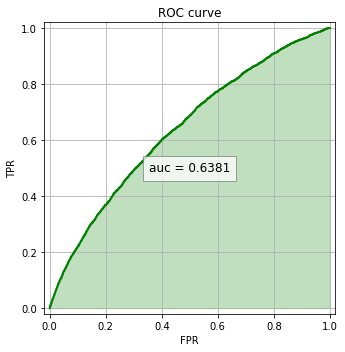

In [82]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plot_curve_w_auc(ax, 'ROC curve', fpr, tpr, 'g', 'FPR', 'TPR')
plt.tight_layout()

ROC-AUC качество невысокое, много ложноположительных результатов из-за дисбаланса классов: как уже говорилось, в классе `+1` более, чем в 25 раз меньше объектов, чем в классе `-1`

**(?)** Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

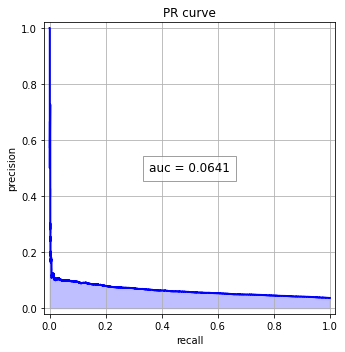

In [83]:
precisions, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
plot_curve_w_auc(ax, 'PR curve', recall, precisions,
          'b', 'recall', 'precision')
plt.tight_layout()

PR-AUC качество очень низкое. И здесь виден дисбаланс классов: при полноте 1.0 точность на уровне 0.04 (много ложноположительных результатов, т.к. объектов из класса `-1` гораздо больше, чем из класса `+1`)

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 12.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем (т.е доля тех клиентов (среди всех клиентов тестовой выборки), которых мы пометили единичками, но у которых на самом деле был 0 в y_test)?

**Замечание-подсказка (!)**
* Порог нужно искать по precision

Требуется:
$$
\frac{TP}{\hat{P}} = \frac{TP}{TP+FP} \geqslant 0.95
\Rightarrow
\text{precision} \geqslant 0.95
$$

In [84]:
from sklearn.metrics import precision_score

In [85]:
precisions = precisions[:-1]  # remove extra 1
min_prec = 0.95

In [86]:
print('thresholds   precisions')
for thr, prec in zip(reversed(thresholds),
                     reversed(precisions)):
    print(f'{thr:.9f}  {prec:.3f}')
    if prec < min_prec:
        break

thresholds   precisions
0.511181642  1.000
0.480095197  1.000
0.472754032  0.667


Требуемый порог для нашей задачи лежит в промежутке $[\approx0.47276, \approx0.51118]$ (при других значениях либо точность низкая, либо пороги не применимы к нашей выборке)

In [87]:
X_train

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,...,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
381341,1,8,0,0,1,0,0,0,0,0,0,12,1,0,0,0.6,0.2,0.557898,3,0.316070,0.661625,0.374433,2.828427,0.3,0.8,0.4,2,1,8,2,9,2,7,2,1,5,8,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1327969,2,2,0,0,0,1,0,0,0,0,0,10,1,0,0,0.8,0.9,0.943729,1,0.316228,0.642824,0.394335,3.162278,0.5,0.8,0.2,3,2,9,1,8,2,5,6,0,2,5,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
601794,0,2,1,0,0,0,0,0,0,0,0,8,0,1,0,0.6,0.4,0.637868,3,0.374166,0.741327,0.318591,3.464102,0.9,0.6,0.2,1,2,9,2,10,2,3,9,1,5,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
632925,6,11,0,1,0,0,0,0,0,0,0,10,0,0,0,0.2,0.0,-1.000000,3,0.374166,0.693848,0.380789,2.449490,0.0,0.5,0.2,2,4,8,4,10,2,9,8,1,2,4,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74864,3,5,0,0,1,0,0,0,1,0,1,10,0,0,0,0.4,0.0,1.184800,3,0.316228,0.663605,0.294449,3.000000,0.3,0.5,0.9,1,2,8,4,8,3,10,9,2,3,8,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215796,2,6,1,0,0,0,0,0,0,0,0,1,0,0,1,0.9,1.1,1.325472,2,0.422019,0.498344,0.387298,0.000000,0.3,0.5,0.7,3,3,9,5,9,3,9,5,1,3,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
514147,1,7,1,0,0,0,0,0,0,0,0,13,1,0,0,0.6,0.6,0.904503,3,0.400000,0.847615,0.338821,3.464102,0.0,0.6,0.1,0,3,8,2,8,2,9,5,1,5,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1182212,3,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0.5,0.4,0.639336,2,0.374166,0.862954,0.399625,3.464102,0.8,0.7,0.0,2,2,7,7,10,2,8,5,1,3,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги (читай: y_pred_i = 1, y_test_i = 1), и те, кто не обратился бы, то есть принёс бы нам деньги (читай: y_pred_i = 1, y_test_i = 0). Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной.  

__Задание 13.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. 

__(0.5 баллa)__

$balance = 100000 \cdot TP - 5000 \cdot FP = 5000 \cdot (20 \cdot TP - (P - TP)) = 5000 \cdot (21 \cdot TP - P) = \left\{TP = P \cdot precision \right\} = 5000 \cdot P \cdot (21 \cdot precision - 1)$

In [88]:
balances = 5000 * np.arange(len(precisions), 0, -1) * (21 * precisions - 1)
best_thr = thresholds[balances >= 0]

In [89]:
best_thr

array([0.02928684, 0.0292871 , 0.02928739, ..., 0.47275403, 0.4800952 ,
       0.51118164])

In [90]:
print(f'Минимальный порог при котором баланс неотрицательный: {best_thr[0]:.4f}')

Минимальный порог при котором баланс неотрицательный: 0.0293


**(?)** А на каком значении порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [91]:
ind = balances.argmax()
print(f'Порог, при котором баланс максимальный: {thresholds[ind]:.4f}\n'
      f'Отказали {len(balances) - ind} клиентам')

Порог, при котором баланс максимальный: 0.0493
Отказали 20886 клиентам


## Часть 6 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 1 БАЛЛ НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 14.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(1 балл)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1.5 баллa)__

For **vw**:

In [92]:
!apt-get install libboost-program-options-dev zlib1g-dev libboost-python-dev vowpal-wabbit
!pip install vowpalwabbit

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libboost-program-options-dev is already the newest version (1.65.1.0ubuntu1).
libboost-program-options-dev set to manually installed.
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
libboost-python-dev is already the newest version (1.65.1.0ubuntu1).
libboost-python-dev set to manually installed.
The following additional packages will be installed:
  libvw0
Suggested packages:
  vowpal-wabbit-doc
The following NEW packages will be installed:
  libvw0 vowpal-wabbit
0 upgraded, 2 newly installed, 0 to remove and 37 not upgraded.
Need to get 797 kB of archives.
After this operation, 3,034 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libvw0 amd64 8.5.0.dfsg1-1 [748 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 vowpal-wabbit amd64 8.5.0.dfsg1-1 [49.1 kB]
Fetched 79

In [93]:
!vw --version

8.5.0


In [94]:
data = pd.read_csv('drive/MyDrive/train_bonus.csv', nrows=10)
data

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ddd2926e,44956a24,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,96809ac8,711ee120,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,b3cf8def,8a4875bd,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,e8275b8f,6332421a,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,a99f214a,9644d0bf,779d90c2,1,0,18993,320,50,2161,0,35,-1,157
5,10000720757801103869,0,14102100,1005,0,d6137915,bb1ef334,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,05241af0,8a4875bd,1,0,16920,320,50,1899,0,431,100077,117
6,10000724729988544911,0,14102100,1005,0,8fda644b,25d4cfcd,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,b264c159,be6db1d7,1,0,20362,320,50,2333,0,39,-1,157
7,10000918755742328737,0,14102100,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,e6f67278,be74e6fe,1,0,20632,320,50,2374,3,39,-1,23
8,10000949271186029916,1,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,37e8da74,5db079b5,1,2,15707,320,50,1722,0,35,-1,79
9,10001264480619467364,0,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,c357dbff,f1ac7184,373ecbe6,0,0,21689,320,50,2496,3,167,100191,23


In [95]:
data.columns

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

Колонки датасета представляют собой: бесполезный признак `id`, целевую переменую `click` и признаки выборки, которые можно разделить на следующие смысловые категории:

In [96]:
for ind in [slice(2, 5), slice(5, 8), slice(8, 11), slice(11, 16), slice(16, 24)]:
    print(list(data.columns[ind]))

['hour', 'C1', 'banner_pos']
['site_id', 'site_domain', 'site_category']
['app_id', 'app_domain', 'app_category']
['device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type']
['C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']


Подготовка к делению датасета на выборки:

In [97]:
from itertools import islice
from sklearn.metrics import roc_auc_score as auc

Из строки Python в строку vowpal wabbit:

In [98]:
def str_to_vw(entry, prefixes, separator_chk):
    arr = entry.strip().split(',')
    res_1 = ('-1' if arr[1] == '0' else '1') + ' '
    res_2 = ' '.join(p + f for p, f in zip(prefixes, arr[2:])) + '\n'
    if separator_chk:
        return int(res_1), res_2
    return res_1 + res_2

AUC score:

In [99]:
def get_auc():
    return auc(np.load('vw/y_test.npy'), np.loadtxt('vw/y_pred.txt'))

Разделим датасет на обучающую выборку `train` (первые 30kk строк) и отложенную выборку `test` (остальное):

In [101]:
filename = 'drive/MyDrive/train_bonus.csv'
# features encoding for vw parser (2 numerical features, other are categorical) 
feature_prefixes = [
    '|F h:', 'c=', 'b:',
    '|S i=', 'd=', 'c=',
    '|A i=', 'd=', 'c=',
    '|D i=', 'p=', 'm=', 't=', 'c=',
    '|C a=', 'b=', 'c=', 'd=', 'e=', 'f=', 'g=', 'e=',
]
train_size=30000000
# to vw
y_test_ = []

with open(filename, 'r') as f_in:
    f_in.readline()  # ignoring names of columns
    # train
    with open('vw/train.vw', 'w') as f_out:
        for line in islice(f_in, train_size):
            f_out.write(str_to_vw(line, feature_prefixes, separator_chk=False))
    # valid
    with open('vw/test.vw', 'w') as f_out:
        for line in f_in:
            ans, vw_line = str_to_vw(line, feature_prefixes, separator_chk=True)
            f_out.write(vw_line)
            y_test_.append(ans)
    np.save('vw/y_test.npy', np.array(y_test_), allow_pickle=False)

Обучаем модель на логистической фунции потерь и сохраняем (**-f**) в файл `model.vw`:

In [102]:
!vw vw/train.vw -f vw/model.vw --loss_function logistic

final_regressor = vw/model.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = vw/train.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.0000       22
0.488136 0.283124            2            2.0  -1.0000  -1.1170       22
0.304292 0.120448            4            4.0  -1.0000  -2.2664       22
0.214658 0.125024            8            8.0  -1.0000  -2.3124       23
0.363789 0.512920           16           16.0  -1.0000  -2.6336       22
0.393967 0.424145           32           32.0  -1.0000  -1.8419       22
0.519177 0.644386           64           64.0  -1.0000  -0.8039       22
0.532424 0.545671          128          128.0  -1.0000  -1.2779       22
0.489940 0.447456          256          256.0   1.0000  -1.7938       22
0.459096 0.428251          512      

Загружаем (**-i**) обученную модель, тестируем модель (**-t**) на отложенной выборке, строим и записываем предсказания (**-p**):

In [103]:
!vw -i vw/model.vw -t vw/test.vw -p vw/y_pred.txt --link logistic

only testing
predictions = vw/y_pred.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = vw/test.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
    n.a.     n.a.            1            1.0  unknown   0.0583       22
    n.a.     n.a.            2            2.0  unknown   0.2208       23
    n.a.     n.a.            4            4.0  unknown   0.0792       22
    n.a.     n.a.            8            8.0  unknown   0.0130       22
    n.a.     n.a.           16           16.0  unknown   0.1508       22
    n.a.     n.a.           32           32.0  unknown   0.0596       22
    n.a.     n.a.           64           64.0  unknown   0.2890       22
    n.a.     n.a.          128          128.0  unknown   0.2035       22
    n.a.     n.a.          256          256.0  unknown   0.2959       23
    n.a.     n.a.         

Будем запоминать AUC score:

In [104]:
auc_scores = []

Считаем AUC score на test (валидационная выборка, выделена из исходного файла `train_bonus.csv`):

In [105]:
auc_scores += [get_auc()]
auc_scores[-1]

0.7385460473067718

Итак, уже на отложенной выборке получаем AUC $\approx 0.7385 \gt 0.7380$

Кастомизируем нашу vw-модель. Во время предсказаний выводилась отладочная информация, вот её начало:

`Num weight bits = 18`<br>
`learning rate = 0.5`<br>
`initial_t = 0`<br>
`power_t = 0.5`<br>
`using no cache`

Изменим `learning rate` (**-l**) и добавим кэширование (**-c**) (полезно при многократном прохождении датасета). Также отключим вывод отладочной информации (**--quiet**), чтобы записи выглядели компактнее

Увеличим `learning rate`:

In [106]:
#train
!vw vw/train.vw -f vw/model.vw --loss_function logistic -l 0.75 -c --quiet
#valid
!vw -i vw/model.vw -t vw/test.vw -p vw/y_pred.txt --link logistic -c --quiet
#score
auc_scores += [get_auc()]
auc_scores[-1]

0.7351652737567378

Уменьшим `learning rate`:

In [107]:
#train
!vw vw/train.vw -f vw/model.vw --loss_function logistic -l 0.25 -c --quiet
#valid
!vw -i vw/model.vw -t vw/test.vw -p vw/y_pred.txt --link logistic -c --quiet
#score
auc_scores += [get_auc()]
auc_scores[-1]

0.7420845051984257

Значит:
1. Увеличение learning rate понизило качество AUC
2. Уменьшение learning rate повысило качество AUC

Наилучшее качество на отложенной выборке $\approx 0.7421 \gt 0.7850$

Мы улучшили baseline AUC $\approx 0.7385$. Библиотека быстрая и, на первый взгляд, с ней легко работать. Для меня было в новинку видеть удобную библиотеку для линейных моделей в ML, в которой легко и "на лету" можно корректировать, оптимизировать модель (изменять `learning rate`, включать кэширование), при надобности получая при этом подробную отладку.

Мне показалось, что это библиотека, в которой вроде бы негде ошибиться и которая сходу будет хорошо работать, если правильно подготовить данные (формат **vw**).

Также хотелось бы попробовать распараллелить вычисления, а в случае ошибок воспользоваться встроенным аудитом (**-audit**).

**Таким образом**, немного поработали с библиотекой **vowpal wabbit**, немного кастомизировали модель и добились на отложенной выборке качества AUC $\approx 0.7421$

Часть 6 **done**.